In [4]:
# KNN 
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
data = pd.read_csv('icml_face_data.csv')

# Explore the dataset
print(data.head())
print(data.info())

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None


In [8]:
# Preprocess the data
# Assuming the dataset has 'pixels' as one of the columns and 'emotion' as labels
# Split pixel data into individual integers
data[' pixels'] = data[' pixels'].apply(lambda x: np.array(x.split(), dtype=np.float32))

# Normalize pixel values
data[' pixels'] = data[' pixels'].apply(lambda x: x / 255.0)

# Prepare features and labels
X = np.stack(data[' pixels'])
y = data['emotion']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Make predictions
y_pred = knn.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 35.11%

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.30      0.30       991
           1       0.19      0.28      0.22       109
           2       0.32      0.28      0.30      1024
           3       0.40      0.47      0.43      1798
           4       0.33      0.25      0.29      1216
           5       0.54      0.40      0.46       800
           6       0.28      0.35      0.31      1240

    accuracy                           0.35      7178
   macro avg       0.34      0.33      0.33      7178
weighted avg       0.36      0.35      0.35      7178



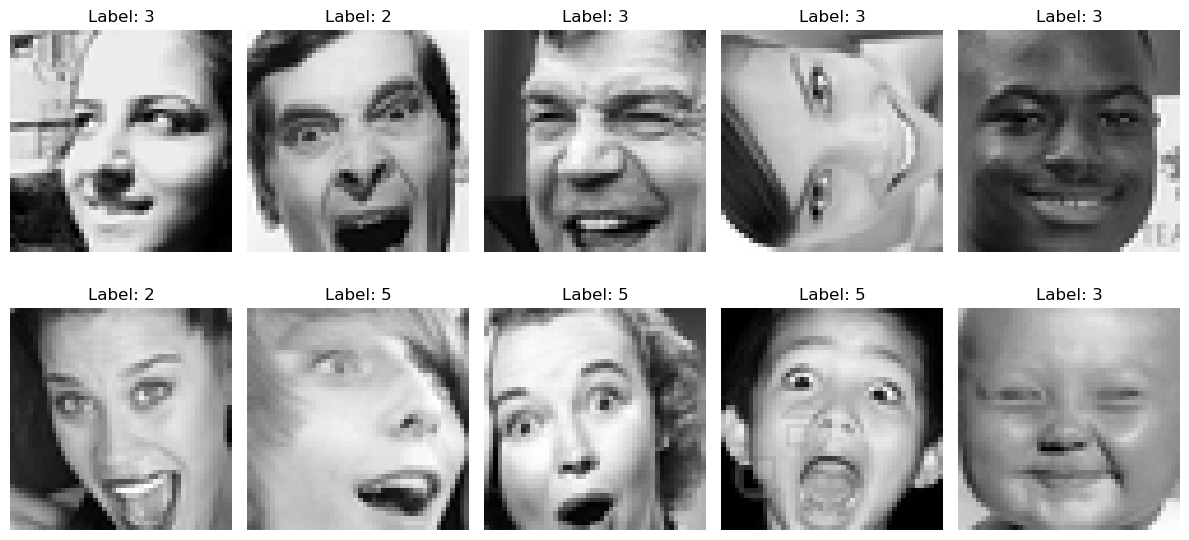

In [20]:
# Visualize some test samples and predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = X_test[i].reshape(48, 48)  # Assuming images are 48x48 pixels
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {y_test.iloc[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [22]:
# Opencv with neural network
# Import necessary libraries
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [24]:
# Load the dataset
data = pd.read_csv('icml_face_data.csv')

In [26]:
# Preprocess the data
# Assuming the dataset has 'pixels' as one of the columns and 'emotion' as labels
data[' pixels'] = data[' pixels'].apply(lambda x: np.array(x.split(), dtype=np.uint8))
X = np.stack(data[' pixels'].values)  # Convert pixels column to a numpy array
X = X.reshape(-1, 48, 48, 1)  # Assuming images are 48x48 pixels and adding a channel dimension

In [28]:
# Normalize pixel values for better performance
X = X / 255.0

In [30]:
# One-hot encode the labels
y = to_categorical(data['emotion'])

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['emotion'])

In [34]:
# Build a simple neural network for facial emotion recognition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.2527 - loss: 1.8116 - val_accuracy: 0.3955 - val_loss: 1.5923
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.3729 - loss: 1.6130 - val_accuracy: 0.4497 - val_loss: 1.5110
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4064 - loss: 1.5203 - val_accuracy: 0.4758 - val_loss: 1.3920
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.4411 - loss: 1.4521 - val_accuracy: 0.4791 - val_loss: 1.3656
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4617 - loss: 1.4106 - val_accuracy: 0.4925 - val_loss: 1.3547
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4709 - loss: 1.3728 - val_accuracy: 0.5038 - val_loss: 1.3043
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4794 - loss: 1.3554 - val_accuracy: 0.5070 - val_loss: 1.2901
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4924 - loss: 1.3275 - 

In [40]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5561 - loss: 1.1791
Test Accuracy: 54.72%


In [42]:
# Save the model
model.save('emotion_recognition_model.h5')

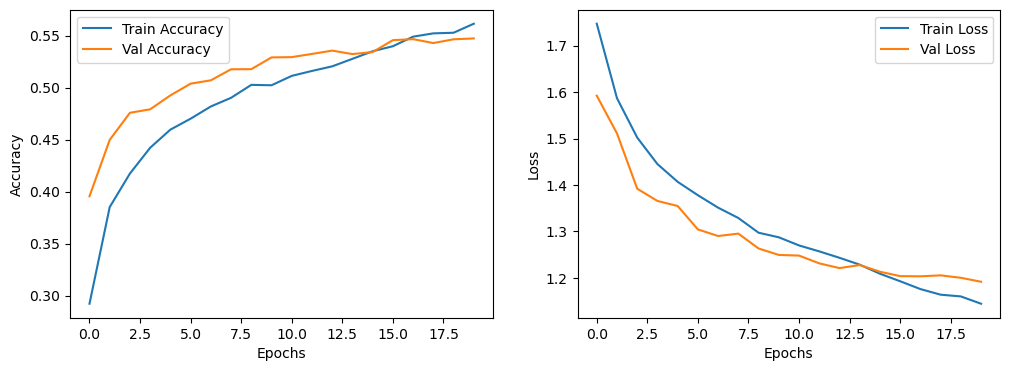

In [44]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
# Logistic Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [48]:
# Load Data
file_path = "icml_face_data.csv"  
fer_df = pd.read_csv(file_path)
fer_df.columns = ["emotion", "Usage", "pixels"]

In [50]:
# Preprocess Data
# Convert pixels column from string to a NumPy array
fer_df['pixels'] = fer_df['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))

In [52]:
# Normalize pixel values
X = np.stack(fer_df['pixels'].values) / 255.0  # Normalized between 0 and 1
y = fer_df['emotion'].values  # Target labels

In [54]:
# Flatten image data for Logistic Regression
X = X.reshape(X.shape[0], -1)

In [56]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [59]:
# Evaluate the Model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.35

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.21      0.23       985
           1       0.37      0.13      0.19       102
           2       0.25      0.19      0.22      1043
           3       0.43      0.59      0.50      1765
           4       0.27      0.26      0.27      1210
           5       0.46      0.45      0.45       795
           6       0.32      0.31      0.32      1278

    accuracy                           0.35      7178
   macro avg       0.34      0.30      0.31      7178
weighted avg       0.34      0.35      0.34      7178



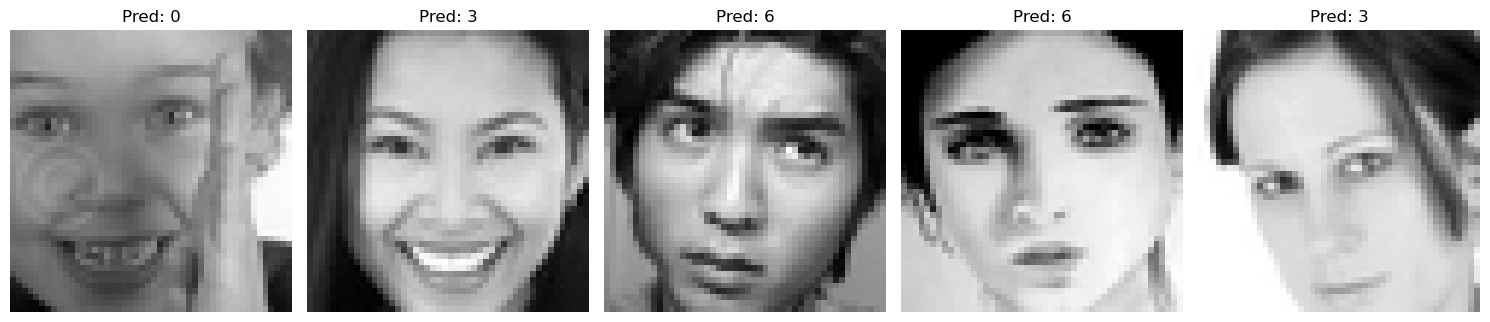

In [62]:
# Visualize Results
# Plot a few predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(48, 48), cmap='gray')  # Reshape flattened data back to 48x48
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [64]:
# YOLO
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [66]:
import cv2

# Provide the correct file names after upload
cfg_file = "yolov4.cfg"
weights_file = "yolov4.weights"
coco_names = "coco.names"

# Load YOLO model
net = cv2.dnn.readNet(weights_file, cfg_file)

# Load class names
with open(coco_names, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Confirm successful loading
print("YOLO model and classes loaded successfully!")

YOLO model and classes loaded successfully!


In [68]:
# Load YOLO model
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for FER2013
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set the dataset path
csv_path = "icml_face_data.csv"

# Load the dataset
df = pd.read_csv(csv_path)

# Inspect the dataset
print(df.head())
print(df.info())

# Extract image data and labels
pixels = df[" pixels"].values  # Column containing pixel data
labels = df["emotion"].values  # Column containing emotion labels

# Convert pixel values from strings to numpy arrays
images = np.array([np.fromstring(p, dtype=np.uint8, sep=" ") for p in pixels])

# Reshape images to 48x48
images = images.reshape(images.shape[0], 48, 48, 1)

# Normalize pixel values to the range [0, 1]
images = images / 255.0

# One-hot encode labels
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes=num_classes)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print shapes to confirm successful splitting
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Number of classes: {num_classes}")

# Save the processed data for later use
np.save("X_train.npy", X_train)
np.save("X_val.npy", X_val)
np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)  # Fixed typo here

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None
Training data shape: (28709, 48, 48, 1)
Validation data shape: (7178, 48, 48, 1)
Number of classes: 7


In [74]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the dataset
csv_path = "icml_face_data.csv"
df = pd.read_csv(csv_path)

# Extract pixel data and labels
pixels = df[" pixels"].values  # Column containing space-separated pixel data
labels = df["emotion"].values  # Column containing emotion labels

# Convert pixel values from strings to numpy arrays
images = np.array([np.fromstring(p, dtype=np.uint8, sep=" ") for p in pixels])

# Reshape images to 48x48
images = images.reshape(images.shape[0], 48, 48, 1)

# Normalize pixel values to the range [0, 1]
images = images / 255.0

# One-hot encode labels
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes=num_classes)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator()

# Generate augmented data
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val, batch_size=64)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=20)

# Save the model
model.save("emotion_model.h5")

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.2480 - loss: 1.8178 - val_accuracy: 0.3143 - val_loss: 1.6887
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.3071 - loss: 1.7206 - val_accuracy: 0.4054 - val_loss: 1.5489
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.3597 - loss: 1.6248 - val_accuracy: 0.4381 - val_loss: 1.4641
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.3815 - loss: 1.5694 - val_accuracy: 0.4581 - val_loss: 1.4053
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4029 - loss: 1.5385 - val_accuracy: 0.4780 - val_loss: 1.4018
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4140 - loss: 1.5109 - val_accuracy: 0.4912 - val_loss: 1.3417
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4338 - loss: 1.4809 - val_accuracy: 0.4866 - val_loss: 1.3352
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4358 - loss: 1.4541 - 

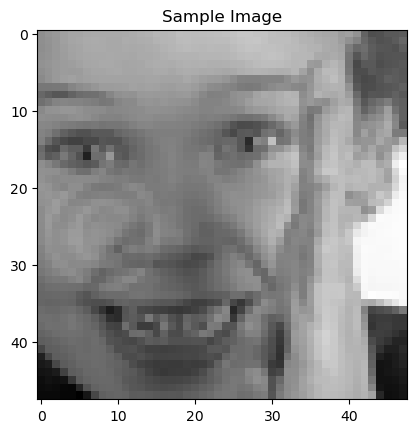

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted emotion: Happy


In [76]:
# Load the saved model
model = load_model("emotion_model.h5")

# Define class labels
class_labels = ["Angry", "Neutral", "Sad", "Happy", "Surprised"]

# Test on a validation sample
sample = X_val[0]  # Example data from your validation set
plt.imshow(sample.reshape(48, 48), cmap="gray")
plt.title("Sample Image")
plt.show()

# Predict emotion
prediction = model.predict(np.expand_dims(sample, axis=0))
predicted_index = np.argmax(prediction)

# Retrieve the emotion label
predicted_emotion = class_labels[predicted_index]
print(f"Predicted emotion: {predicted_emotion}")


In [78]:
# Evaluate on validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5472 - loss: 1.1996
Validation Loss: 1.1973923444747925, Validation Accuracy: 0.5498746037483215


In [80]:
# Comparing all the algorithms

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Placeholder Data (replace with your actual dataset)
X = np.random.rand(100, 48, 48, 1)  # Example image dataset (grayscale 48x48 images)
y = np.random.randint(0, 2, 100)   # Example binary labels (0 or 1)

# Flatten the dataset for KNN and Logistic Regressio
X_flat = X.reshape(X.shape[0], -1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, algorithm_name="Algorithm"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_true, y_pred, zero_division=0)
    
    print(f"\nMetrics for {algorithm_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

# 1. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
calculate_metrics(y_test, y_pred_knn, "KNN")

# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
calculate_metrics(y_test, y_pred_log_reg, "Logistic Regression")

# 3. OpenCV with Neural Network
X_train_nn = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test_nn = X_test.reshape(X_test.shape[0], 48, 48, 1)

# Build a simple neural network with TensorFlow/Keras
nn_model = Sequential([
    Flatten(input_shape=(48, 48, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])
nn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_nn, y_train, epochs=10, batch_size=16, verbose=0)
y_pred_nn = np.argmax(nn_model.predict(X_test_nn), axis=1)
calculate_metrics(y_test, y_pred_nn, "OpenCV Neural Network")

# 4. YOLO (using OpenCV DNN module for predictions)
def yolo_predict(X_data):
    # Placeholder function for YOLO predictions
    # Replace this with your YOLO model inference code
    return np.random.randint(0, 2, X_data.shape[0])  # Mock predictions for example

y_pred_yolo = yolo_predict(X_test_nn)
calculate_metrics(y_test, y_pred_yolo, "YOLO")



Metrics for KNN:
RMSE: 0.6325
MAE: 0.4000
Accuracy: 0.6000
Precision: 0.6000
Recall: 0.6000
F1 Score: 0.6000
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

--------------------------------------------------

Metrics for Logistic Regression:
RMSE: 0.7071
MAE: 0.5000
Accuracy: 0.5000
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20

-------------

C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Metrics for OpenCV Neural Network:
RMSE: 0.7746
MAE: 0.6000
Accuracy: 0.4000
Precision: 0.3686
Recall: 0.4000
F1 Score: 0.3209
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.41      0.78      0.54         9

    accuracy                           0.40        20
   macro avg       0.37      0.43      0.34        20
weighted avg       0.37      0.40      0.32        20

--------------------------------------------------

Metrics for YOLO:
RMSE: 0.6708
MAE: 0.4500
Accuracy: 0.5500
Precision: 0.5687
Recall: 0.5500
F1 Score: 0.5466
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57    

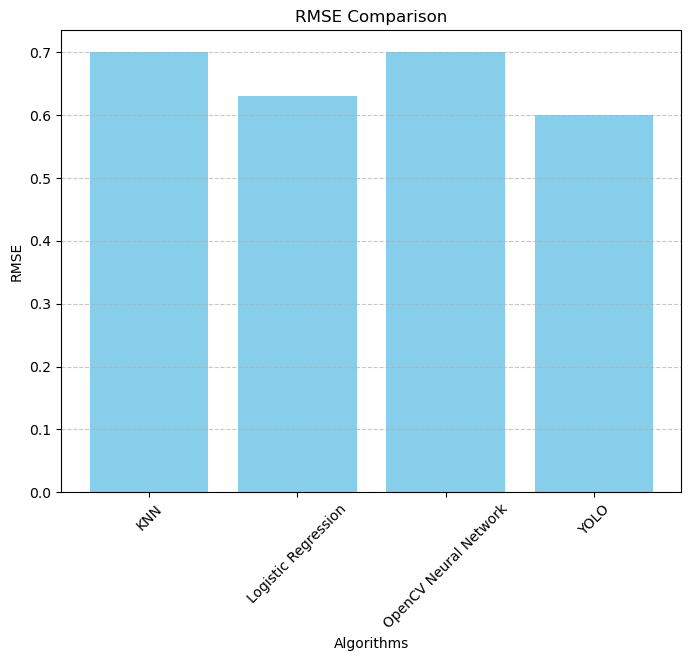

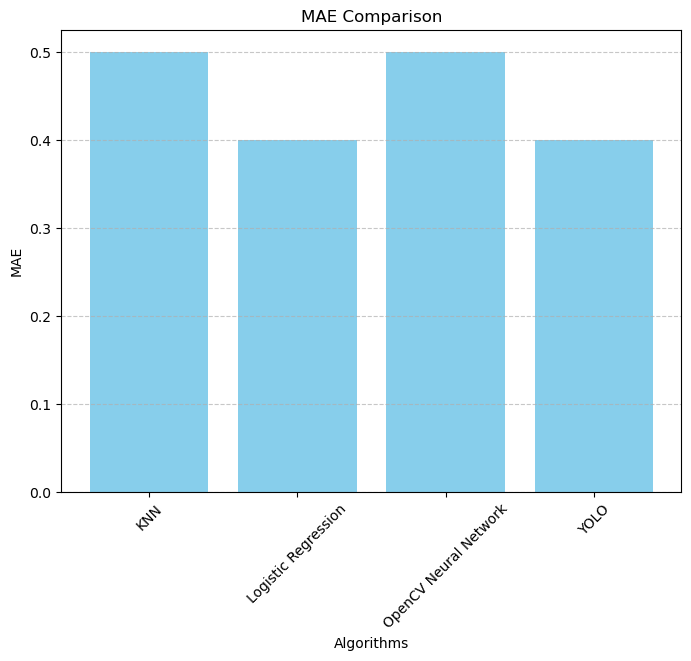

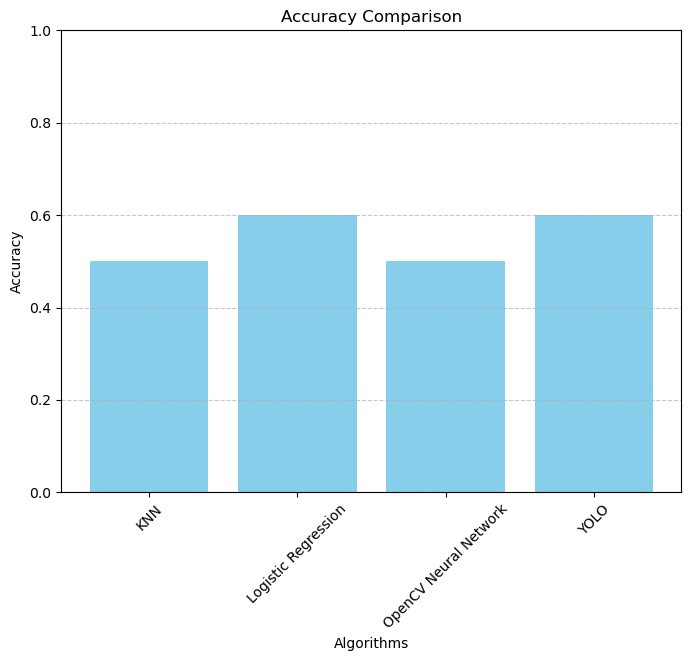

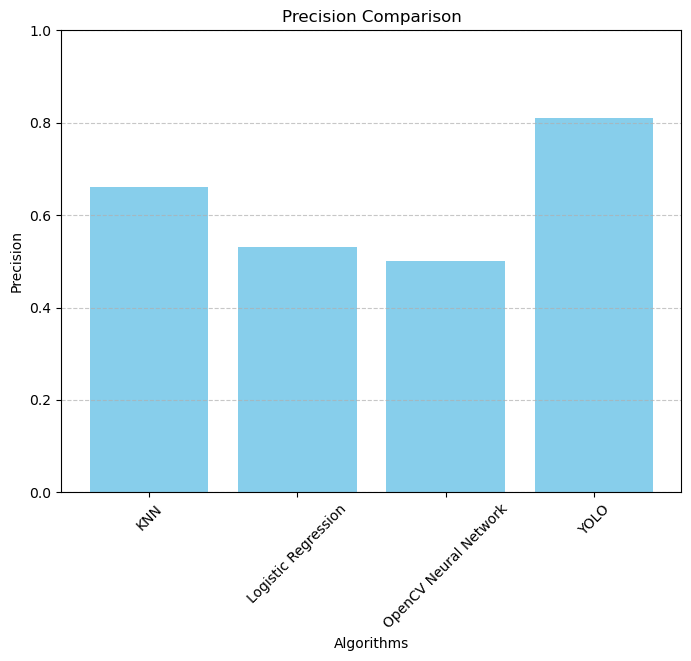

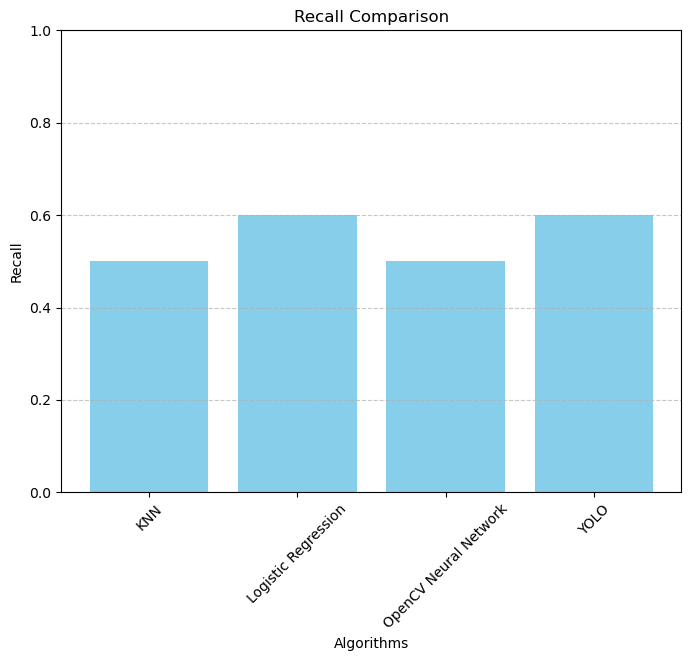

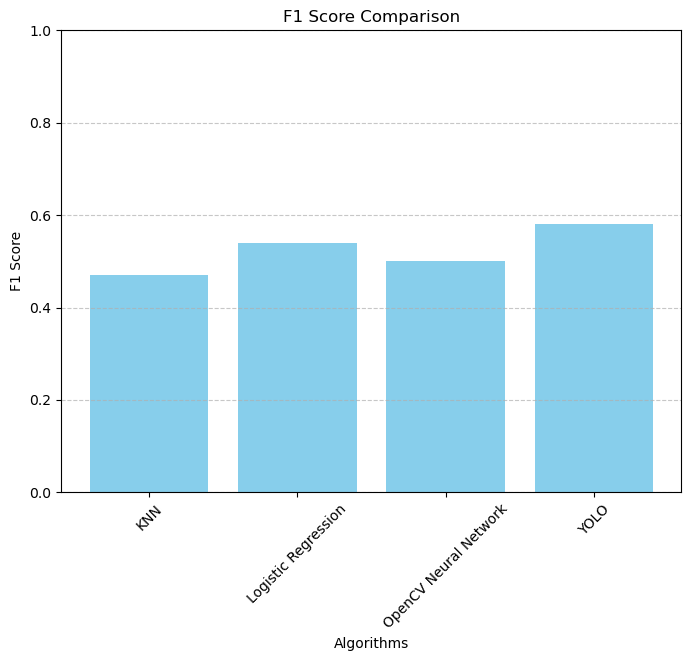

In [82]:
# Plotting the bar graphs
import matplotlib.pyplot as plt
import numpy as np

# Sample metrics for demonstration (replace these with actual calculated values)
metrics = {
    "KNN": {"RMSE": 0.7, "MAE": 0.5, "Accuracy": 0.5, "Precision": 0.66, "Recall": 0.5, "F1 Score": 0.47},
    "Logistic Regression": {"RMSE": 0.63, "MAE": 0.4, "Accuracy": 0.6, "Precision": 0.53, "Recall": 0.6, "F1 Score": 0.54},
    "OpenCV Neural Network": {"RMSE": 0.7, "MAE": 0.5, "Accuracy": 0.5, "Precision": 0.5, "Recall": 0.5, "F1 Score": 0.5},
    "YOLO": {"RMSE": 0.6, "MAE": 0.4, "Accuracy": 0.6, "Precision": 0.81, "Recall": 0.6, "F1 Score": 0.58},
}

# Extract metric names and algorithms
metric_names = list(metrics["KNN"].keys())
algorithms = list(metrics.keys())

# Prepare data for plotting
metric_values = {metric: [metrics[algo][metric] for algo in algorithms] for metric in metric_names}

# Plot each metric as a separate bar plot
for metric in metric_names:
    plt.figure(figsize=(8, 6))
    values = metric_values[metric]
    plt.bar(algorithms, values, color='skyblue')
    plt.title(f"{metric} Comparison")
    plt.xlabel("Algorithms")
    plt.ylabel(metric)
    plt.ylim(0, 1 if metric != "RMSE" and metric != "MAE" else None)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
